Kaggle DIGIT RECOGNITION competition

1. Load and explore training data. Info from Kaggle: 

File: train.csv

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [1]:
import numpy as np
import scipy as sc
#import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
import pandas

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
# Constants definition
imageShape = (28,28)
imagePixels = imageShape[0]*imageShape[1]

In [3]:
# Limitamos a 5000 filas para las primeras pruebas
data = np.genfromtxt ('train.csv', delimiter=",", skip_header=1) #, max_rows = 5000
data.shape

(42000L, 785L)

In [4]:
data[:5,:10]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

(28L, 28L)

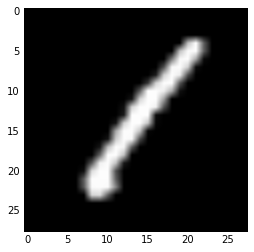

In [5]:
# Show the first image
image1 = np.reshape(data[0,1:],imageShape)
imgplot = plt.imshow(image1, cmap='gray')
image1.shape

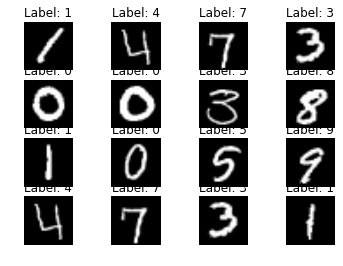

In [6]:
# Show first 4x4 images
f, axarr = plt.subplots(4,4)
for i in range(0,4):
    for j in range(0,4):
        im = np.reshape(data[i+3*j,1:], imageShape)
        axarr[i,j].imshow(im, cmap='gray')
        axarr[i,j].set_title('Label: ' + str(int(data[i+3*j,0])))
        axarr[i,j].axis('off')


[4132L, 4684L, 4177L, 4351L, 4072L, 3795L, 4137L, 4401L, 4063L, 4188L]

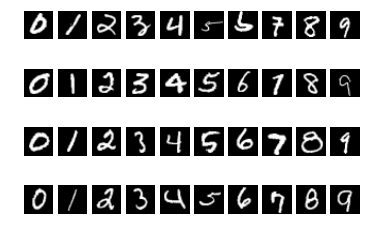

In [7]:
# Sort images by labels

dataarranged = data[data[:, 0].argsort()]
samplesbylabel = [];

# Show first 4x4 images
f, axarr = plt.subplots(4,10)
for i in range(0,10):
    for j in range(0,4):
        subdata = dataarranged[dataarranged[:,0] == i,:]
        im = np.reshape(subdata[j,1:], imageShape)
        axarr[j,i].imshow(im, cmap='gray')
        #axarr[i,j].set_title('Tag: ' + str(int(dataarranged[i+3*j,0])))
        axarr[j,i].axis('off')
        
    samplesbylabel.append(subdata.shape[0])
    
samplesbylabel # number of samples by label

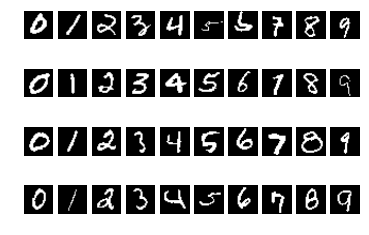

In [8]:
# Binarize images
threshold = 128
ylabels = dataarranged[:,0]
binim = dataarranged[:,1:] > threshold 
ylabels.shape
binimages = np.column_stack((ylabels, binim ))

#Show
f, axarr = plt.subplots(4,10)
for i in range(0,10):
    for j in range(0,4):
        subdata = binimages[binimages[:,0] == i,:]
        im = np.reshape(subdata[j,1:], imageShape)
        axarr[j,i].imshow(im, cmap='gray')
        #axarr[i,j].set_title('Tag: ' + str(int(dataarranged[i+3*j,0])))
        axarr[j,i].axis('off')

In [9]:
# Train test split
X = binim
y = ylabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(29400L, 784L), (12600L, 784L), (29400L,), (12600L,)]

In [13]:
# Define and train model
classif = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(10,10 ),alpha=1, verbose=0))
classif.fit(X_train, y_train)
y_pred = classif.predict(X_test)
print("Training set score: %f" % classif.score(X_train, y_train))


Iteration 1, loss = 0.25971290
Iteration 2, loss = 0.08771800
Iteration 3, loss = 0.07096732
Iteration 4, loss = 0.06396960
Iteration 5, loss = 0.06005202
Iteration 6, loss = 0.05729251
Iteration 7, loss = 0.05625786
Iteration 8, loss = 0.05364392
Iteration 9, loss = 0.05278592
Iteration 10, loss = 0.05228526
Iteration 11, loss = 0.05152257
Iteration 12, loss = 0.05114630
Iteration 13, loss = 0.05071269
Iteration 14, loss = 0.05081580
Iteration 15, loss = 0.05091008
Iteration 16, loss = 0.05026914
Iteration 17, loss = 0.04974566
Iteration 18, loss = 0.05033200
Iteration 19, loss = 0.04970505
Iteration 20, loss = 0.04978765
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.28067942
Iteration 2, loss = 0.09792702
Iteration 3, loss = 0.07774122
Iteration 4, loss = 0.06912936
Iteration 5, loss = 0.06410646
Iteration 6, loss = 0.06052861
Iteration 7, loss = 0.05792012
Iteration 8, loss = 0.05618323
Iteration 9, loss = 0.05428399

In [14]:
print("Testing set score: %f" % accuracy_score(y_test, y_pred))


Testing set score: 0.952540


In [15]:
confusion_matrix(y_test, y_pred)

array([[1201,    0,    3,    3,    2,    7,    9,    1,   10,    4],
       [   0, 1390,    2,    4,    1,    2,    0,    0,    3,    3],
       [  12,    7, 1195,    8,    6,    1,    0,   14,    8,    2],
       [   2,    6,   16, 1226,    0,   22,    2,    2,   22,    7],
       [   3,   13,    4,    1, 1154,    0,    5,    2,    3,   37],
       [   8,    7,    2,   15,    3, 1077,    8,    0,    8,   11],
       [  14,    9,    5,    3,    4,   11, 1188,    0,    7,    0],
       [   7,   16,   14,    3,   10,    3,    1, 1242,    4,   20],
       [   3,   21,    8,   11,    3,   15,    7,    3, 1132,   16],
       [   2,    6,    2,    6,   13,    6,    1,   14,    9, 1197]])